<a href="https://colab.research.google.com/github/NatashaGwena/CORE-WEEK-8-IP/blob/main/Moringa_Data_Science_Core_W8_IP_2021_10_Natasha_Gwena_PythonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothyrodism Detection Model

## 1. Defining the Question

### a) Specifying the Data Analytic Question

To build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success

The project will be a success if we are able to create a model that will accurately determine whether or not a patient symptoms indicate that the patient has hypothyroid. We will use accuracy score, confusion matrix, mse as the metrics for testing perfomance of our models 


### c) Understanding the context 

Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Hypothyroidism is tested using personal and family history, Physical examinations and blood tests. 

Physical Examination—Looking for Signs of Hypothyroidism which include:

Evidence of dry skin,Swelling around the eyes and legs, Slower reflexes, Slower heart rate

Blood Tests: Hypothyroidism can be detected by different blood tests.

TSH Test.  A thyroid-stimulating hormone or TSH is a blood test that measures the amount of T4 (thyroxine) that the thyroid is being signaled to make. If you have an abnormally high level of TSH, it could mean you have hypothyroidism.
T4 (thyroxine) Test. The thyroid gland produces T4 (thyroxine). The free T4 and the free T4 index are blood tests that, in combination with a TSH test, can let your physician know how your thyroid is functioning. 

### d) Experimental design taken

In this study, we will be conducting Exploratory Data Analysis to study the relationships between the different variables. Later we will create a number of  models to try find the most accurate model to predict hypothyroidism


### e) Data Relevance

Nairobi Hospital conducted a clinical camp to test for hypothyroidism.The data provided focuses on the findings of the camp.

**Definition of variables:**

Age

Sex

on_thyroxine

query_on_thyroxine

on_antithyroid_medicationthyroid_surgery

query_hypothyroid

query_hyperthyroid

pregnant

sick

tumor

lithium

goitre

TSH_measured

TSH

T3_measured

T3

TT4_measured

TT4

## 2. Reading and Checking the Data

In [ ]:
#First we will import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#plt.rcParams['figure.figsize'] = (12,6)


In [ ]:
#Loading dataset
data = pd.read_csv('/content/hypothyroid.csv')
#Previewing data
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
data.shape
#Dataset has 3163 rows and 26 columns

(3163, 26)

In [ ]:
data.info()
#All rows in our dataset are of type 'object'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
data['status'].unique()
# This will be our target variable

array(['hypothyroid', 'negative'], dtype=object)

In [ ]:
#Checking for unique values in all columns
for column in data.columns:
  print(column)

  print(data[column].unique())
  print('\n')

status
['hypothyroid' 'negative']


age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


sex
['M' 'F' '?']


on_thyroxine
['f' 't']


query_on_thyroxine
['f' 't']


on_antithyroid_medication
['f' 't']


thyroid_surgery
['f' 't']


query_hypothyroid
['f' 't']


query_hyperthyroid
['f' 't']


pregnant
['f' 't']


sick
['f' 't']


tumor
['f' 't']


lithium
['f' 't']


goitre
['f' 't']


TSH_measured
['y' 'n']


TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35

Most of our dataset is categorical with values f, t, y, n. For this analysis we will assume:

F - female

M - male

f - false

t - true

y - yes

n - no

? - NaN

In [ ]:
data.describe().transpose()

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


## 3. Tidying the Dataset

Our dataset consists of individual medical information which vary from person to person. Also some of the missing values are present because a certain test was not taken. Therefore we are going to fill in columns with the mean values if a patient tested negative for hypothyroid and with the mean values for those that tested positive. Also for missing values in age and sex columns we will fill in age with median and drop all nan values is sex.

In [ ]:
#Drop all the rows with ?
data.replace('?', np.nan, inplace=True)
data.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [ ]:
#Change column datatypes to appropriate datatypes to enable us deal with NaNs

num_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

# Categorical columns list
cat_cols = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured', 'FTI_measured', 'TBG_measured']


  
# Use a for loop to change columns to their appriopriate datatypes
#
for column in data.columns:
  if column in num_cols:
    data[column] = data[column].astype('float')
  elif column in cat_cols:
    data[column] = data[column].astype('category')

  
# Preview the column datatypes 

data.dtypes


status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [ ]:
#Fill in age and sdropping all nans in the sex column
data['age'].fillna(value=data['age'].median(), inplace=True)
data = data[data['sex'].notna()]
data.isnull().sum()

status                          0
age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           456
T3_measured                     0
T3                            683
TT4_measured                    0
TT4                           244
T4U_measured                    0
T4U                           243
FTI_measured                    0
FTI                           242
TBG_measured                    0
TBG                          2835
dtype: int64

In [ ]:
#Fill in missing values with mean according whether their diagnosis was positive or negative 
data = data.groupby('status').apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [ ]:
#Check and dropping duplicates
data.drop_duplicates(inplace = True)
data.shape

(3012, 26)

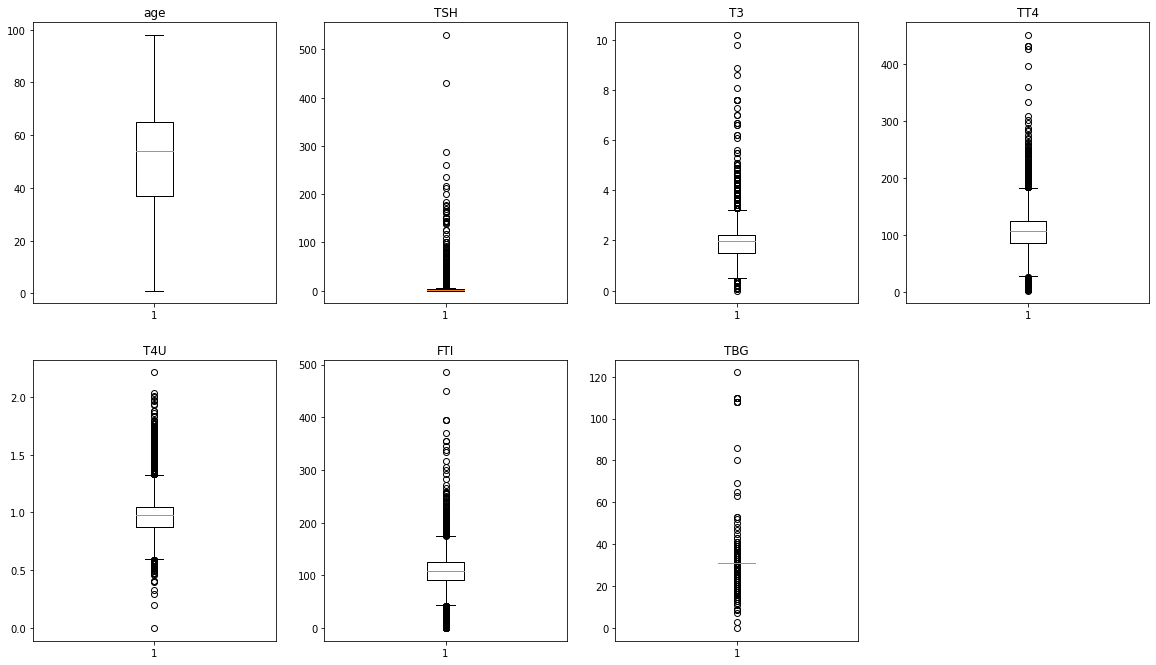

In [ ]:
# Check for outliers
#
columns_dict={'age':1, 'TSH':2, 'T3':3, 'TT4':4, 'T4U':5, 'FTI':6, 'TBG':7}
plt.figure(figsize=(20,30))
# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(data[variable])
  plt.title(variable)
plt.show()


## 4. Exploratory Data Analysis

### Variable relationships

In [ ]:
sex_mean = data.groupby(['sex', 'status'] )['TSH'].mean().unstack(1)
sex_mean
#From the dataset women had higher levels of TSH as compared to men

status,hypothyroid,negative
sex,,
F,68.686626,2.669145
M,59.952703,1.759734


In [ ]:
#Check which gender participated most in the clinical camp
#Also check which gender had the highest positive cases for hypothyroid
gender = data.groupby(['sex', 'status'] )['sex'].count().unstack(1)
gender

status,hypothyroid,negative
sex,,
F,102,2017
M,37,856


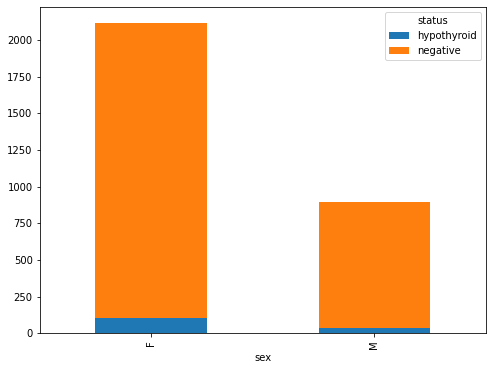

In [ ]:
gender.plot.bar(stacked=True, figsize=(8, 6))
#More women were tested. Also more women tested positive as compared to men
#It is also important to note that our data is 
#Also that the greater population of people who participated in the camp tested negative for hypothyroid

In [ ]:
#Check  difference in ages for both men and female with hypothyroid 
hypo = data[data['status']=='hypothyroid']
import plotly.express as px
fig = px.histogram(hypo, x="age", y="status", color="sex", width=600)
fig.show()


#Females from the ages 50 to 79 recorded more positive cases as compared to younger ones
#Men from around the age of 40 also recorde more positives than the younger ones

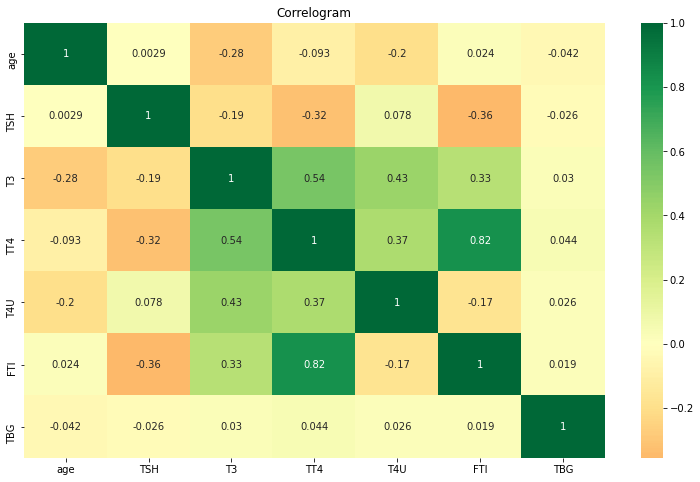

In [ ]:
#Correlation
#columns_dict={'age':1, 'TSH':2, 'T3':3, 'TT4':4, 'T4U':5, 'FTI':6, 'TBG':7}
corr = data[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram')
plt.show()

#TT4 results are highly correlated  with results of FTI
#TT4 results have a moderate correlation with results of T3

In [ ]:
#Realationship between results of TT4 and of FTI
fig = px.scatter(data, x="TT4", y="FTI", color="status", width=600)
fig.show()

#Where status is positive, the values for TT4 and FTI are relatively low. 
#This observation is not absolute because there are a few tests that are low but the status is negative

In [ ]:
fig = px.scatter(data, x="TT4", y="T3", color="status", width=600)
fig.show()
#The highest number of positives is is when t3 is below 1.1 and TT4 below 44
#Also most people have a TT3 value of between 1.40and 3.4 and a TT4 value of between 64 and 160 

### Distribution of data

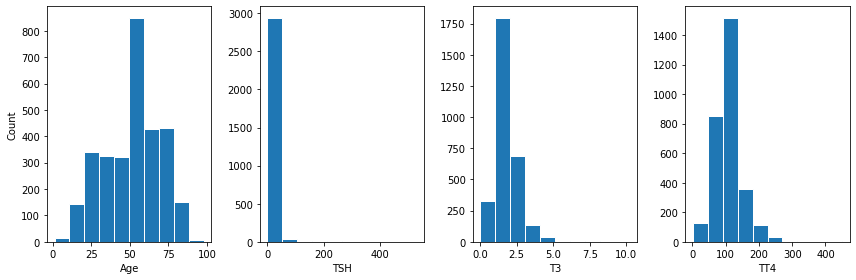

In [ ]:
#Distribution for the numeric variables
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (12,4))

ax1.hist(data['age'], bins=10, edgecolor = 'white', align = 'mid')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

ax2.hist(data['TSH'], edgecolor = 'white', align = 'mid')
ax2.set_xlabel('TSH')

ax3.hist(data['T3'], edgecolor = 'white', align = 'mid')
ax3.set_xlabel('T3')

ax4.hist(data['TT4'], edgecolor = 'white', align = 'mid')
ax4.set_xlabel('TT4')



plt.tight_layout()
plt.show()

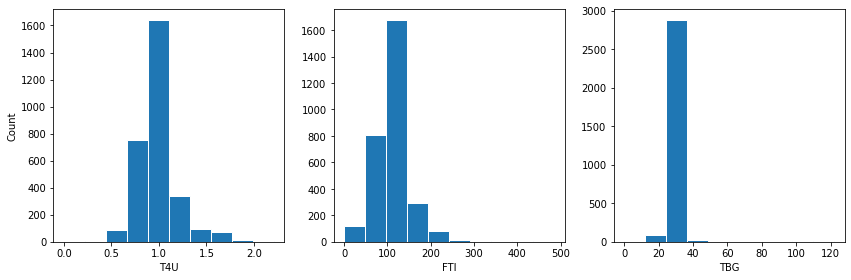

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,4))

ax1.hist(data['T4U'], bins=10, edgecolor = 'white', align = 'mid')
ax1.set_xlabel('T4U')
ax1.set_ylabel('Count')

ax2.hist(data['FTI'], edgecolor = 'white', align = 'mid')
ax2.set_xlabel('FTI')

ax3.hist(data['TBG'], edgecolor = 'white', align = 'mid')
ax3.set_xlabel('TBG')


plt.tight_layout()
plt.show()

## 5. Modelling

Finally we will try to predict status using two supervised machine learning methods: decision trees(random forest and gradient boosted trees) and SVM(Polynomial, linear and rbf kernel function). First we will prepare the inputs (feature scaling and one-hot encoding), then apply the models to the train set. We will use confusion matrix, accuracy score and MSE as the major metrics to evaluate the performances of the models. We will then fine tune our models but tuning hyperparameters using Cross-validation.

It is also important to note that we are creating a model to predict status, i.e whether a patient tests positive or negative for hypothyroidism. This is a classification problem hence we will use classifiers.

### **a. Feature Engineering**

We encode our categorical variables in preparation for modelling.

Status: hypothyroid = 0  , negative = 1

sex: F = 0 , M = 1

on_thyroxine: f = 0, t = 1	

query_on_thyroxine	: f = 0, t = 1

on_antithyroid_medication	: f = 0, t = 1

thyroid_surgery	: f = 0, t = 1

query_hypothyroid	: f = 0, t = 1

query_hyperthyroid: f = 0, t = 1

pregnant	: f = 0, t = 1

sick	: f = 0, t = 1

tumor	: f = 0, t = 1

lithium	: f = 0, t = 1

goitre: f = 0, t = 1

TSH_measured: n = 0, y = 1

T3_measured	: n = 0, y = 1

TT4_measured: n = 0, y = 1

T4U_measured: n = 0, y = 1

FTI_measured: n = 0, y = 1

TBG_measured: n = 0, y = 1	


In [ ]:
#Encode using label encoder
from sklearn.preprocessing import LabelEncoder

mod_data = data.apply(LabelEncoder().fit_transform)
mod_data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,69,1,0,0,0,0,0,0,0,0,0,0,0,1,161,1,7,1,22,1,108,1,19,0,25
1,0,12,0,1,0,0,0,0,0,0,0,0,0,0,1,218,1,19,1,26,1,73,1,26,0,25
2,0,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,5,1,60,1,0,0,25
3,0,21,0,0,0,0,0,0,0,0,0,0,0,0,1,234,1,5,1,8,1,64,1,9,0,25
4,0,74,1,0,0,0,0,0,0,0,0,0,0,0,1,106,1,14,1,62,1,88,1,48,0,25


In [ ]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is tested positive for hypothyroid, so we use the column status as y
y = mod_data['status'].values


test_features = mod_data.columns.to_list()
test_features.remove('status')

X = mod_data[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



### **b(i). RandomForest Classifier**







**With default hyperparameters**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

# predictions
rfc_pred = rfc.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': rfc_pred})
print("=== Comparison Frame ===")
print(comparison_frame.describe())

from sklearn import metrics

# And now we assess the errors
print('\n')
print("=== Errors ===")

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfc_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfc_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfc_pred)))

from sklearn.metrics import accuracy_score , confusion_matrix
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print("=== Accuracy Score ===")
print(accuracy_score(y_test, rfc_pred))



=== Comparison Frame ===
           Actual   Predicted
count  904.000000  904.000000
mean     0.961283    0.962389
std      0.193026    0.190358
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


=== Errors ===
Mean Absolute Error: 0.0011061946902654867
Mean Squared Error: 0.0011061946902654867
Root Mean Squared Error: 0.033259505261886965


=== Confusion Matrix ===
[[ 34   1]
 [  0 869]]


=== Accuracy Score ===
0.9988938053097345


Using default hyperparameters we achieved an accuracy score 99.8%. From the confusion matrix, we see that only one prediction was wrong. Our model is overfit. We will tune our parameters to fix the overfittness

**Tuning hyperparameters**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.3min finished


{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 27}


In [ ]:
rfc1 = RandomForestClassifier(n_estimators=1000, max_depth=27, max_features='auto')
rfc1.fit(X_train,y_train)

# predictions
rfc1_pred = rfc1.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': rfc1_pred})
print("=== Comparison Frame ===")
print(comparison_frame.describe())

from sklearn import metrics

# And now we assess the errors
print('\n')
print("=== Errors ===")

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfc1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfc1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfc1_pred)))

from sklearn.metrics import accuracy_score , confusion_matrix
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc1_pred))
print('\n')
print("=== Accuracy Score ===")
print(accuracy_score(y_test, rfc1_pred))


=== Comparison Frame ===
           Actual   Predicted
count  904.000000  904.000000
mean     0.961283    0.962389
std      0.193026    0.190358
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


=== Errors ===
Mean Absolute Error: 0.0011061946902654867
Mean Squared Error: 0.0011061946902654867
Root Mean Squared Error: 0.033259505261886965


=== Confusion Matrix ===
[[ 34   1]
 [  0 869]]


=== Accuracy Score ===
0.9988938053097345


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [10,20,50,100,200,500,1000]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [4,5,6]
max_depth.append(None)

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc2_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc2_random.fit(X_train, y_train)
# print results
print(rfc2_random.best_params_)




Fitting 3 folds for each of 56 candidates, totalling 168 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 56 is smaller than n_iter=100. Running 56 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   17.0s


{'n_estimators': 20, 'max_features': 'auto', 'max_depth': 6}


[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:  1.1min finished


In [ ]:
rfc2 = RandomForestClassifier(n_estimators=20, max_depth=6, max_features='auto')
rfc2.fit(X_train,y_train)

# predictions
rfc2_pred = rfc2.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': rfc1_pred})
print("=== Comparison Frame ===")
print(comparison_frame.describe())

from sklearn import metrics

# And now we assess the errors
print('\n')
print("=== Errors ===")

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfc2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfc2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfc2_pred)))

from sklearn.metrics import accuracy_score , confusion_matrix
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc2_pred))
print('\n')
print("=== Accuracy Score ===")
print(accuracy_score(y_test, rfc2_pred))

=== Comparison Frame ===
           Actual   Predicted
count  904.000000  904.000000
mean     0.961283    0.962389
std      0.193026    0.190358
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


=== Errors ===
Mean Absolute Error: 0.0011061946902654867
Mean Squared Error: 0.0011061946902654867
Root Mean Squared Error: 0.033259505261886965


=== Confusion Matrix ===
[[ 34   1]
 [  0 869]]


=== Accuracy Score ===
0.9988938053097345


In the **first instance**, we use the following hyperparameters: {'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 27}. And get the followiing results:

 === Confusion Matrix ===
[[ 34   1]
 [  0 869]]


=== Accuracy Score ===
0.9988938053097345

For the **second instance**, we use the hyperparameters: {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 5}. And get the following results:

=== Confusion Matrix ===
[[ 34   1]
 [  0 869]]


=== Accuracy Score ===
0.9988938053097345

Even after tuning our hyperparameters, our model is still overfit with results being similar to using default hyperparameters. We therefore try boosting our RandomForest model using gradient boosted trees.

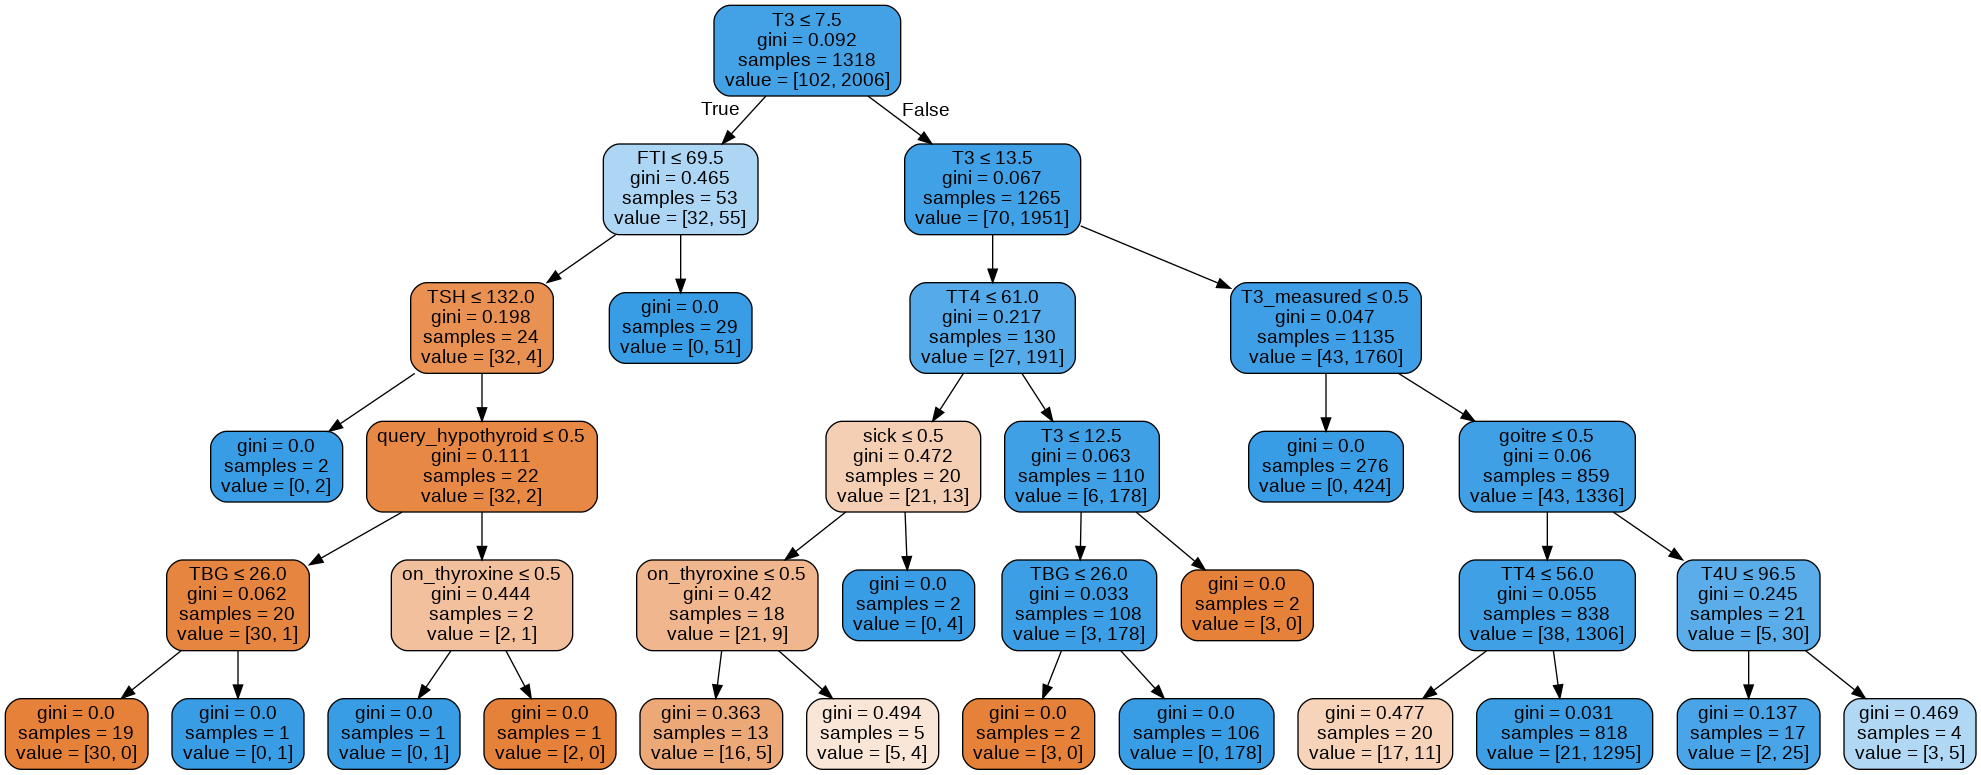

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = rfc2.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())


### **b(ii). Gradient Boosted Trees**

In [ ]:
#Tuning the learning rate hyperparameter
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()


Learning rate:  0.05
Accuracy score (training): 0.953
Accuracy score (validation): 0.961

Learning rate:  0.1
Accuracy score (training): 0.977
Accuracy score (validation): 0.979

Learning rate:  0.25
Accuracy score (training): 0.992
Accuracy score (validation): 0.992

Learning rate:  0.5
Accuracy score (training): 0.996
Accuracy score (validation): 0.991

Learning rate:  0.75
Accuracy score (training): 0.973
Accuracy score (validation): 0.970

Learning rate:  1
Accuracy score (training): 0.963
Accuracy score (validation): 0.967



We try each of the learning rate, while checking accuracy score and the confusion matrix

In [ ]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

# Assessing the errors
print('\n')
print("=== Errors ===")

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, gb_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, gb_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, gb_pred)))

from sklearn.metrics import accuracy_score , confusion_matrix
print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, gb_pred))
print('\n')
print("=== Accuracy Score ===")
print(accuracy_score(y_test, gb_pred))



=== Errors ===
Mean Absolute Error: 0.029867256637168143
Mean Squared Error: 0.029867256637168143
Root Mean Squared Error: 0.17282145884457792


=== Confusion Matrix ===
[[ 24  11]
 [ 16 853]]


=== Accuracy Score ===
0.9701327433628318


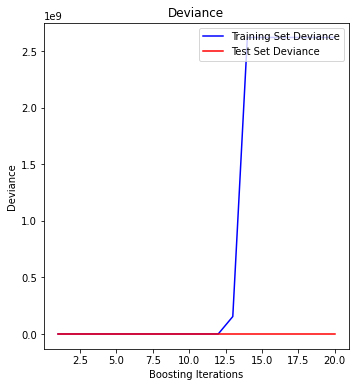

In [ ]:
target_number_of_trees = 20
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
# the train_score_ variable is a list that records the deviance of the model for any given number of trees. gbr.train_score_[0] is the deviance when we only had the initial tree, whereas
# gbr.train_score_[100] is the deviance by the time we have created 100 trees.
# This is plotted against a simple list that goes from 1 to our target number of trees.
plt.plot(np.arange(target_number_of_trees) + 1, gb.train_score_, 'b-',
         label='Training Set Deviance')

# We also want to see how well we could handle the test set each time. 
# The staged_predict function takes an X, and returns a list of the predictions for X at various stages of the training: What did we pick when we had 1 tree, 2 trees, 3 trees, etc.
# We will compare our predictions at each stage against the test data, and compute the deviance
test_score = np.zeros((target_number_of_trees,), dtype=np.float64) # this is just a list of 0s

for i, gb_pred in enumerate(gb.staged_predict(X_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = gb.loss_(y_test, gb_pred)
    
plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()


Finally, we use learning rate = 0.75. This rate gives us the best model as compared to the other rates. it is balanced as shown by the confusion matrix and it is not overfit.

This will therefore be our most accepatable model. We will use it to  to determine which features are most impactful in influencing the prediction

In [ ]:
# Get numerical feature importances
importances = list(gb.feature_importances_)

# Use code to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.21), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.2), ('T3_measured', 0.0), ('T3', 0.05), ('TT4_measured', 0.0), ('TT4', 0.23), ('T4U_measured', 0.03), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.2), ('TBG_measured', 0.0), ('TBG', 0.04)]

Variable: TT4                  Importance: 0.23
Variable: sick                 Importance: 0.21
Variable: TSH                  Importance: 0.2
Variable: FTI                  Importance: 0.2
Variable: T3                   Importance: 0.05
Variable: TBG                  Importance: 0.04
Variable: T4U_measured         Importance: 0.03
Variable: age                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: qu

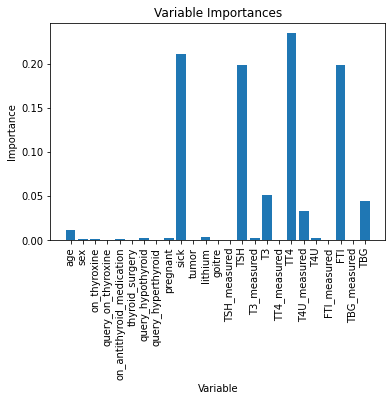

In [ ]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


The following were the most important features to ascertain whether a patient's test is positive or negative for hypothyroidism

 TT4       with an            Importance: 0.23

SICK        with an         Importance: 0.21

 TSH        with an           Importance: 0.2

 FTI        with an           Importance: 0.2

 T3       with an             Importance: 0.05

 TBG      with an             Importance: 0.04

T4U_measured   with an       Importance: 0.03

AGE        with an          Importance: 0.01

### **c(i). SVM**

Here we will apply Polynomial, linear and rbf kernel function to build our SVM model and then evaluate their performance and pick the kernel that performs the best.  We will also tune our parameters to improve the performance of our model.

****************** 
We will be using the data we splitted when we were preparing for modelling. Since we are using SVM here, we will scale our features.

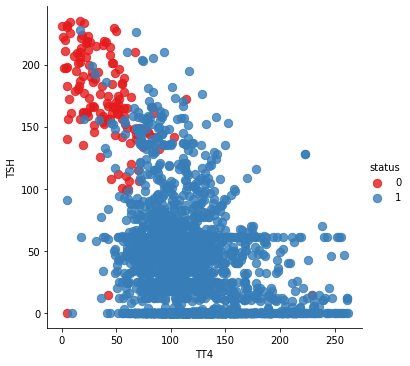

In [ ]:
# Plotting with two features from gradient boosting feature importance
sns.lmplot('TT4','TSH', data=mod_data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})


In [ ]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is tested positive for hypothyroid, so we use the column status as y
yt = mod_data['status'].values


# test_features = mod_data.columns.to_list()
# test_features.remove('status')

Xf = mod_data[['TT4', 'TSH']].values

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xf = scaler.fit_transform(Xf)

# Train using 70% of the data.
Xf_train, Xf_test, yt_train, yt_test = train_test_split(Xf, yt, test_size=0.3, random_state=0)






We use default hyperparameters first
*********************
**RBF Kernel**

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(Xf_train, yt_train)

rbf_pred=rbfclassifier.predict(Xf_test)
print('===Accuracy Score===')
print(metrics.accuracy_score(yt_test,rbf_pred))

print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(yt_test, rbf_pred))

===Accuracy Score===
0.9889380530973452


=== Confusion Matrix ===
[[ 28   7]
 [  3 866]]


**Polynomial**

In [ ]:
polyclassifier = SVC(kernel='poly')
# Training the model using the training set
polyclassifier.fit(Xf_train, yt_train)

poly_pred=rbfclassifier.predict(Xf_test)
print('===Accuracy Score===')
print(metrics.accuracy_score(yt_test,poly_pred))

print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(yt_test, poly_pred))

===Accuracy Score===
0.9889380530973452


=== Confusion Matrix ===
[[ 28   7]
 [  3 866]]


**Linear**

In [ ]:
linclassifier = SVC(kernel='linear')
# Training the model using the training set
linclassifier.fit(Xf_train, yt_train)

lin_pred=rbfclassifier.predict(Xf_test)
print('===Accuracy Score===')
print(metrics.accuracy_score(yt_test,lin_pred))

print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(yt_test, lin_pred))

===Accuracy Score===
0.9889380530973452


=== Confusion Matrix ===
[[ 28   7]
 [  3 866]]


With default hyperparameters the models perform the same. We will therefore tune the hyperparameters and evaluate perfomance of each model
****************
**K-fold cross validation for different kernels using gridsearch**



In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(Xf_train, yt_train)

# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
svm_pred = final_model.predict(Xf_test)
#svm_pred_label = list(encoder.inverse_transform(svm_pred))

Best score for training data: 0.9829226283617206 

Best C: 100 

Best Kernel: rbf 

Best Gamma: 0.001 



The best SVM kernel to use is rbf, with c = 100 and gamma = 0.001

We will use rbf with the above hyperparameters, to create a new model. We will use all the features that were found from gradient boost  to be most impactful in influencing the prediction
*************
**Final model**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is tested positive for hypothyroid, so we use the column status as y
y = mod_data['status'].values


# test_features = mod_data.columns.to_list()
# test_features.remove('status')

X = mod_data[['TT4', 'TSH', 'sick', 'FTI', 'T3', 'TBG', 'T4U_measured', 'age']].values

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
model = SVC(kernel='rbf', C= 100, gamma= 0.001)
# Training the model using the training set
model.fit(X_train, y_train)

mod_pred=model.predict(X_test)
print('===Accuracy Score===')
print(metrics.accuracy_score(y_test, mod_pred))

print('\n')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, mod_pred))

===Accuracy Score===
0.9900442477876106


=== Confusion Matrix ===
[[ 29   6]
 [  3 866]]


## 6. Conclusion

**Model Perfomance:**

Our final model, i.e using SVM RBF Kernel, c = 100 and gamma = 0.001, and using all the important features from gradient boosting classifier,, outperformed all the other models. The model has an accuracy score of 99%. The values of the confusion matrix are:

=== Confusion Matrix ===

[[ 29   6]

 [  3 866]] 

Meaning that our model predicted 29 positive cases where patients had actually tested positive for hypothyroidism and 866 negative cases where the people had actually tested negative. The model also predicted 3 false positives and 6 false negatives.

It is therefore the best model to use for hypothyroid prediction using the following features: 'TT4', 'TSH', 'sick', 'FTI', 'T3', 'TBG', 'T4U_measured', 'age'.